In [1]:
import pandas as pd
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'C:\Users\fmasa\Downloads\INFLUD-05-06-2020.csv'
df = pd.read_csv(filename, delimiter=';', 
                 error_bad_lines=False)

b'Skipping line 61924: expected 143 fields, saw 144\n'
b'Skipping line 144314: expected 143 fields, saw 145\n'
b'Skipping line 197590: expected 143 fields, saw 145\n'
b'Skipping line 211050: expected 143 fields, saw 144\n'
b'Skipping line 233432: expected 143 fields, saw 144\n'
c:\users\fmasa\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (0,2,60,62,63,64,109,111) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape

(243760, 143)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243760 entries, 0 to 243759
Columns: 143 entries, #NU_NOTIFIC to PAC_DSCBO
dtypes: float64(89), object(54)
memory usage: 215.7+ MB


In [5]:
df.columns

Index(['#NU_NOTIFIC', 'DT_NOTIFIC', 'SEM_NOT', 'DT_SIN_PRI', 'SEM_PRI',
       'SG_UF_NOT', 'ID_REGIONA', 'CO_REGIONA', 'ID_MUNICIP', 'CO_MUN_NOT',
       ...
       'DT_DIGITA', 'HISTO_VGM', 'PAIS_VGM', 'CO_PS_VGM', 'LO_PS_VGM',
       'DT_VGM', 'DT_RT_VGM', 'PCR_SARS2', 'PAC_COCBO', 'PAC_DSCBO'],
      dtype='object', length=143)

In [6]:
# Tabelas de microdados usam números, faço a correspondência desses números com seus significados
troca_raça = {1:'Branca', 2:'Preta', 3:'Amarela',
              4:'Parda', 5:'Indígena', 9:'Ignorado'}
troca_escolaridade = {0:'Sem', 1:'Fund1', 
                      2:'Fund2', 3:'Médio',
                      4:'Superior', 
                      5:'Não se aplica',
                      9:'Ignorado'}

In [7]:
df.loc[(df.CS_RACA.isnull()), 'CS_RACA'] = 9
df['CS_RACA'] = df['CS_RACA'].apply(lambda x: troca_raça[x])
df.loc[(df.CS_ESCOL_N.isnull()), 'CS_ESCOL_N'] = 9
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].apply(lambda x: troca_escolaridade[x])
df.SEM_NOT = df.SEM_NOT.apply(pd.to_numeric, errors='coerce')
df['#NU_NOTIFIC'].dropna()

0         315815207637
1         315829036587
2         315815126716
3         315808133362
4         315829005835
              ...     
243755    315912956669
243756    315912179107
243757    315912801780
243758    315913656734
243759    315913737298
Name: #NU_NOTIFIC, Length: 243760, dtype: object

In [8]:
df.sample(10)

,#NU_NOTIFIC,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ETINIA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,...,CO_LAB_IF,PCR_RESUL,DT_PCR,POS_PCRFLU,TP_FLU_PCR,PCR_FLUASU,FLUASU_OUT,PCR_FLUBLI,FLUBLI_OUT,POS_PCROUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,DS_PCR_OUT,LAB_PCR,CO_LAB_PCR,CLASSI_FIN,CLASSI_OUT,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,OBSERVA,DT_DIGITA,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO
6727,315899408193,16/05/2020 00:00:00,20.0,16/05/2020 00:00:00,20.0,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,HOSP MUN CARMEN PRUDENTE,5420938.0,M,22/03/1948 00:00:00,72.0,3.0,3072.0,6.0,Ignorado,NaN,Ignorado,BRASIL,1.0,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,1.0,9.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,...,NaN,3.0,19/05/2020 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFIP VILA CLEMENTINO,3813517.0,4.0,NaN,1.0,2.0,16/05/2020 00:00:00,26/05/2020 00:00:00,NaN,19/05/2020 00:00:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190373,315877462466,24/04/2020 00:00:00,17.0,20/04/2020 00:00:00,17.0,SP,GVE XXVI SAO JOAO DA BOA VISTA,1350.0,ESPIRITO SANTO DO PINHAL,351518.0,HOSPITAL FRANCISCO ROSAS,2751623.0,M,12/10/1992 00:00:00,27.0,3.0,3027.0,6.0,Branca,NaN,Superior,BRASIL,1.0,SP,GVE XXVI SAO JOAO DA BOA VISTA,1350.0,ESPIRITO SANTO DO PINHAL,351518.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,...,NaN,2.0,28/04/2020 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,2.0,24/04/2020 00:00:00,29/04/2020 00:00:00,NaN,24/04/2020 00:00:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144438,315888779738,14/04/2020 00:00:00,16.0,11/04/2020 00:00:00,15.0,PE,001,1497.0,RECIFE,261160.0,HOSPITAL OSWALDO CRUZ,477.0,M,20/09/1990 00:00:00,29.0,3.0,3029.0,6.0,Branca,NaN,Superior,BRASIL,1.0,PE,001,1497.0,OLINDA,260960.0,1.0,9.0,9.0,9.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,...,NaN,2.0,19/04/2020 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LAB CENTRAL DE SAUDE PUB DR MILTON BEZERRA SOB...,2712075.0,4.0,NaN,1.0,9.0,NaN,12/05/2020 00:00:00,NAO CONSTA INTERNAMENTO NO MV.,07/05/2020 00:00:00,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170297,315835140832,06/03/2020 00:00:00,10.0,19/02/2020 00:00:00,8.0,RS,002 CRS,1607.0,PORTO ALEGRE,431490.0,HOSPITAL NOSSA SENHORA DA CONCEICAO SA,2237571.0,F,09/04/2016 00:00:00,3.0,3.0,3003.0,6.0,Parda,NaN,Sem,BRASIL,1.0,RS,002 CRS,1607.0,PORTO ALEGRE,431490.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,...,2237571.0,2.0,27/02/2020 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LABORATORIO LACEN,4066251.0,4.0,NaN,1.0,1.0,17/03/2020 00:00:00,23/03/2020 00:00:00,NaN,06/03/2020 00:00:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15766,315881744328,29/04/2020 00:00:00,18.0,20/04/2020 00:00:00,17.0,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,HOSPITAL SALVALUS,9554157.0,M,20/09/2003 00:00:00,16.0,3.0,3016.0,6.0,Ignorado,NaN,Ignorado,BRASIL,1.0,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,1.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9554157.0,1.0,09/05/2020 00:00:00,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INSTITUTO ADOLFO LUTZ SAO PAULO,2091364.0,5.0,NaN,1.0,2.0,11/05/2020 00:00:00,12/05/2020 00:00:00,IAL COLHIDO 29/04. EXAME PCR DETECTAVEL 27/04 ...,29/04/2020 00:00:00,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
30467,315892971716,09/05/2020 00:00:00,19.0,04/05/2020 00:00:00,19.0,MS,NRS DE AQUIDAUANA,1964.0,NIOAQUE,500580.0,UNIDADE MISTA AROLDO LIMA COUTO,2676869.0,M,11/10/2002 00:00:00,17.0,3.0,3017.0,6.0,Parda,NaN,Fund1,BRASIL,1.0,MS,NRS DE AQUIDAUANA,1964.0,NIOAQUE,500580.0,2.0,1.0,2.0,2.0,1.0,2.0,

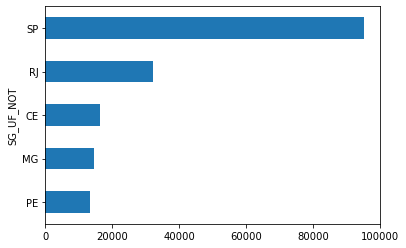

In [9]:
df.groupby('SG_UF_NOT').size().sort_values().tail(5).plot(kind='barh')

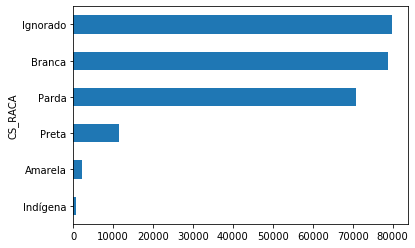

In [10]:
df.groupby('CS_RACA').size().sort_values().plot(kind='barh')

In [11]:
df.groupby('CS_RACA').size().sort_values()

CS_RACA
Indígena      549
Amarela      2113
Preta       11427
Parda       70799
Branca      78966
Ignorado    79906
dtype: int64

In [12]:
df.groupby('CS_ESCOL_N').size().sort_values(ascending=False)

CS_ESCOL_N
Ignorado         153263
Médio             25064
Fund1             21305
Fund2             14026
Superior          13258
Não se aplica     10407
Sem                6437
dtype: int64

In [13]:
df.query('HISTO_VGM == 1')['HISTO_VGM'].value_counts()

1.0    943
Name: HISTO_VGM, dtype: int64

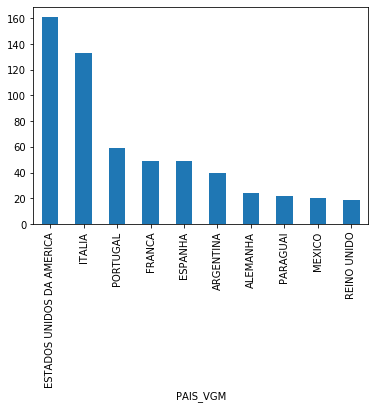

In [14]:
df.query('HISTO_VGM == 1 and PAIS_VGM != "BRASIL"').groupby('PAIS_VGM').size().sort_values(ascending=False).head(10).plot(kind='bar')


In [15]:
df.query('CARDIOPATI == 1')['CARDIOPATI'].value_counts()

1.0    70410
Name: CARDIOPATI, dtype: int64

In [16]:
df.query('DIABETES == 1')['DIABETES'].value_counts()

1.0    50093
Name: DIABETES, dtype: int64

In [17]:
df.query('OBESIDADE == 1')['OBESIDADE'].value_counts()

1.0    6441
Name: OBESIDADE, dtype: int64

In [18]:
df.query('NU_IDADE_N >= 60')['NU_IDADE_N'].count()

112604

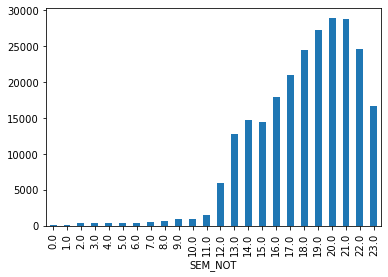

In [19]:
df.groupby('SEM_NOT').size().plot(kind='bar')

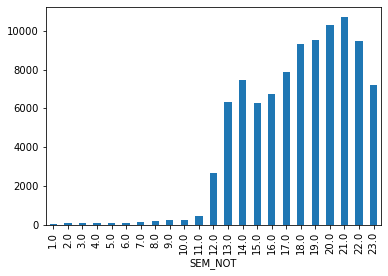

In [20]:
df.query('SG_UF_NOT == "SP"').groupby('SEM_NOT').size().plot(kind='bar')

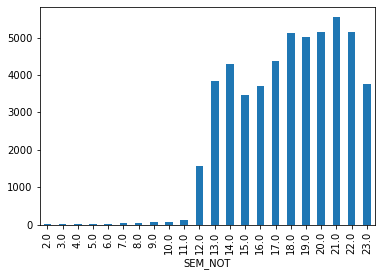

In [21]:
df.query('ID_MUNICIP == "SAO PAULO"').groupby('SEM_NOT').size().plot(kind='bar')